<a href="https://colab.research.google.com/github/arielpincayy/classifier_for_malaria/blob/main/CNN_Classifier_for_Malaria_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np

np.random.seed(1000)

import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras

In [ ]:
#image_directory = '/content/drive/MyDrive/REDES_NEURONALES/Datasets/Unit_6_Deep_Generative_Models/Convolutional_AutoEncoder/cell_images2/'
image_directory = '/content/drive/MyDrive/Reduced_data/'
SIZE = 64
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

In [ ]:
#parasitized_images = os.listdir(image_directory + 'parasitized/images/')
parasitized_images = os.listdir(image_directory + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):    #Remember enumerate method adds a counter and returns the enumerate object

    if (image_name.split('.')[1] == 'png'):
        #image = cv2.imread(image_directory + 'parasitized/images/' + image_name)
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)


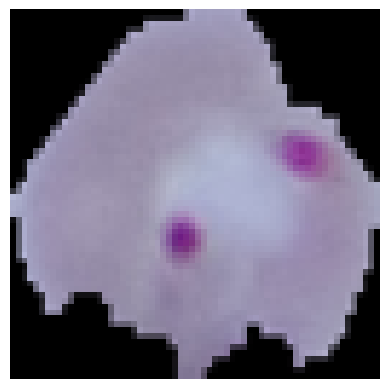

In [ ]:
import matplotlib.pyplot as plt

# Visualiza la imagen guardada en 'image'
plt.imshow(image)
plt.axis('off')  # Oculta los ejes para una mejor visualización
plt.show()

In [ ]:
uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        #image = cv2.imread(image_directory + 'uninfected_train/images/' + image_name)
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

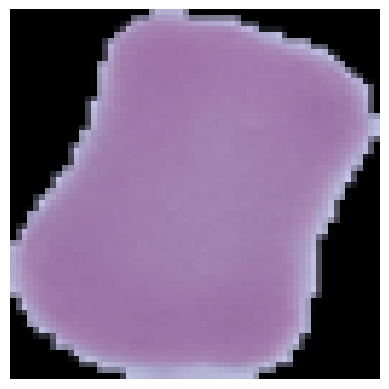

In [ ]:
import matplotlib.pyplot as plt

# Visualiza la imagen guardada en 'image'
plt.imshow(image)
plt.axis('off')  # Oculta los ejes para una mejor visualización
plt.show()

In [ ]:
image.show()

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

X_train, X_test, y_train, y_test = train_test_split(dataset, np.array(label), test_size = 0.20, random_state = 0)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

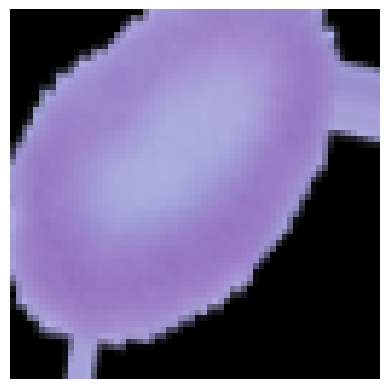

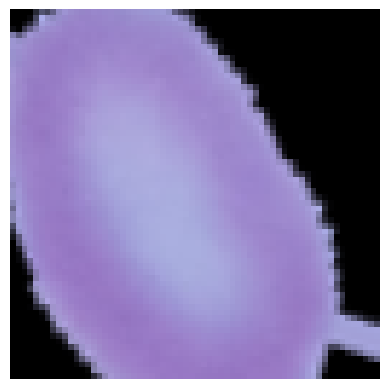

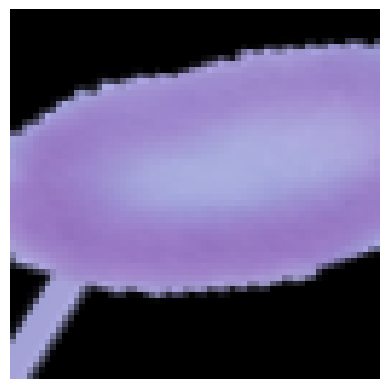

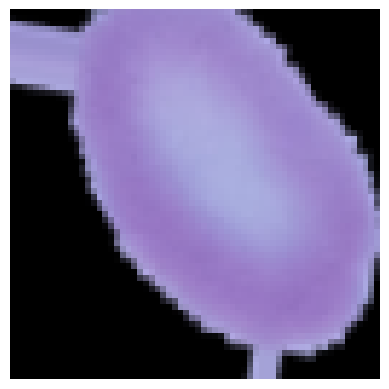

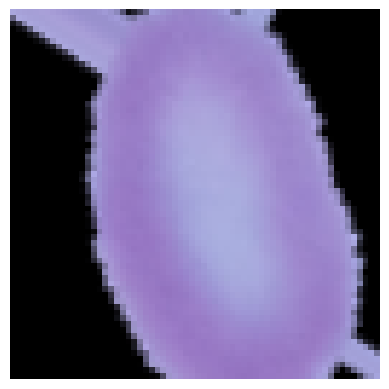

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,        # Rota aleatoriamente las imágenes hasta 30 grados
    zoom_range=0.2,           # Zoom aleatorio dentro del 20%
    width_shift_range=0.1,    # Desplaza horizontalmente un 10%
    height_shift_range=0.1,   # Desplaza verticalmente un 10%
    shear_range=0.1,          # Cizalladura aleatoria
    horizontal_flip=True,     # Voltea horizontalmente
    fill_mode='nearest'       # Cómo rellenar los pixeles nuevos
)
# ... (rest of your code)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Tomar una imagen para ver las aumentaciones
sample = X_train[0].reshape((1,) + X_train[0].shape)  # (1, 64, 64, 3)

# Generar y visualizar 5 versiones aumentadas
i = 0
for batch in datagen.flow(sample, batch_size=1):
    plt.figure()
    plt.imshow(batch[0].astype('uint8'))
    plt.axis('off')
    i += 1
    if i == 5:
        break

In [ ]:
X_train = np.array(X_train) / 255.
X_test = np.array(X_test) / 255.
X_val = np.array(X_val) / 255.

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - AUC: 0.5735 - Precision: 0.5861 - Recall: 0.5153 - accuracy: 0.5519 - loss: 1.9139 - val_AUC: 0.6125 - val_Precision: 0.5130 - val_Recall: 0.9080 - val_accuracy: 0.5146 - val_loss: 0.6857
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - AUC: 0.6467 - Precision: 0.5970 - Recall: 0.6438 - accuracy: 0.5805 - loss: 0.6616 - val_AUC: 0.6858 - val_Precision: 1.0000 - val_Recall: 0.0230 - val_accuracy: 0.5029 - val_loss: 0.7694
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - AUC: 0.6459 - Precision: 0.6460 - Recall: 0.4797 - accuracy: 0.5943 - loss: 0.7051 - val_AUC: 0.6738 - val_Precision: 0.5810 - val_Recall: 0.7011 - val_accuracy: 0.5906 - val_loss: 0.6391
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - AUC: 0.7702 - Precision: 0.6871 - Recall: 0.6913 - accuracy: 0.6870 - loss: 0.5804 - val_AUC: 0.6943 - val_Precision: 0.6923 - val_Recall: 0.5172 - val_accuracy: 0.6374 - val_loss: 0.6317
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45

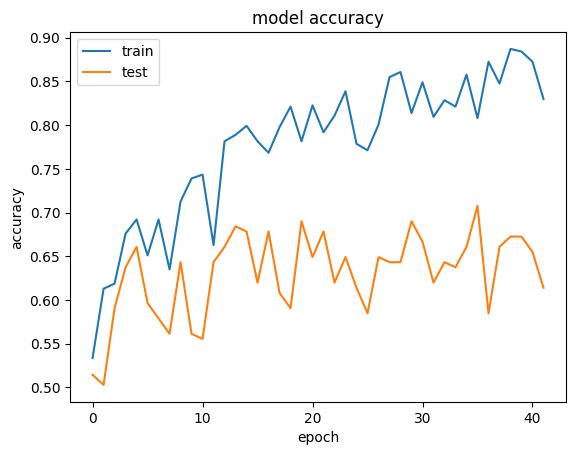

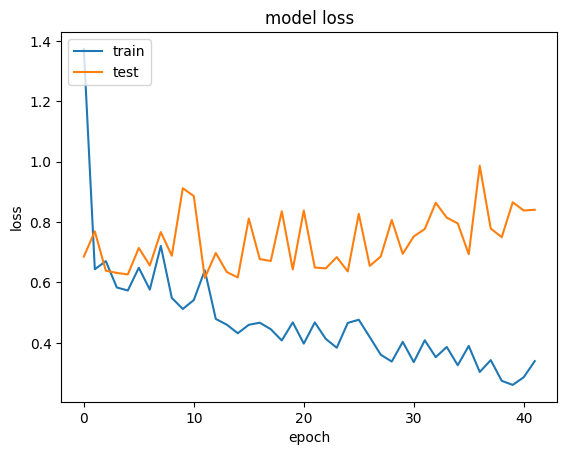

In [ ]:
model_feedForward = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(150, activation='relu', input_shape=(SIZE, SIZE, 3)),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_feedForward.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

# Callback de Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',     # métrica a monitorear
    patience=30,             # n° de épocas sin mejora antes de detener
    restore_best_weights=True,  # recupera los mejores pesos encontrados
    verbose=1
)

history_feedForward = model_feedForward.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)


loss, accuracy, auc, precision, recall = model_feedForward.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

#Further analysis of training metrics
print(history_feedForward.history.keys())

#Summarize history for accuracy
plt.plot(history_feedForward.history['accuracy'])
plt.plot(history_feedForward.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Summarize history for loss
plt.plot(history_feedForward.history['loss'])
plt.plot(history_feedForward.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - accuracy: 0.5078 - loss: 0.6998 - val_accuracy: 0.5263 - val_loss: 0.6869
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 203ms/step - accuracy: 0.6443 - loss: 0.6674 - val_accuracy: 0.6725 - val_loss: 0.6392
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.6449 - loss: 0.6052 - val_accuracy: 0.7427 - val_loss: 0.5658
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.6504 - loss: 0.6082 - val_accuracy: 0.6959 - val_loss: 0.6090
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step - accuracy: 0.7179 - loss: 0.5663 - val_accuracy: 0.6491 - val_loss: 0.5772
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 324ms/step - accuracy: 0.7011 - loss: 0.5212 - val_accuracy: 0.7602 - val_loss: 0.4880
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.7691 - loss: 0.5047 - val_accuracy: 0.5380 - val_loss: 0.8284
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 288ms/step - accuracy: 0.6712 - loss: 0.6018 - val_accuracy: 0.7193

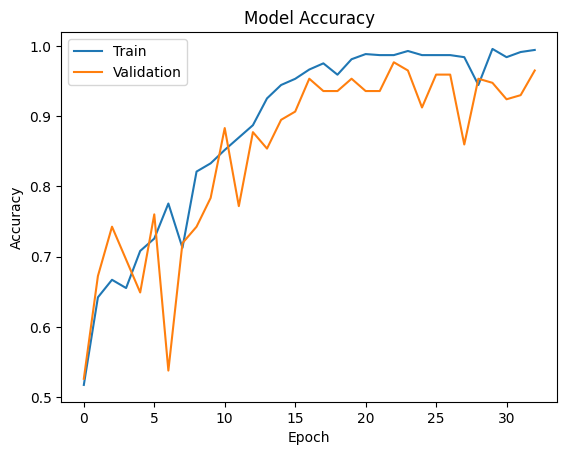

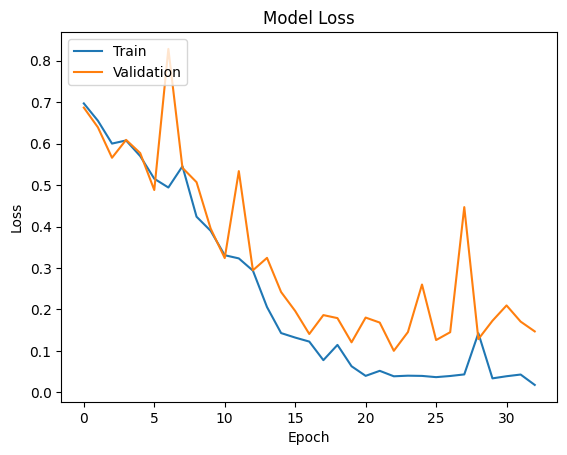

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt

# Define el modelo
model_cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(SIZE, SIZE, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model_cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callback de Early Stopping
early_stop = EarlyStopping(
    monitor='val_accuracy',     # métrica a monitorear
    patience=10,             # n° de épocas sin mejora antes de detener
    restore_best_weights=True,  # recupera los mejores pesos encontrados
    verbose=1
)

# Entrenar el modelo con EarlyStopping
history_cnn = model_cnn.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, y_val),  # Use your test data for validation
    callbacks=[early_stop]
)

# Evaluar el modelo
loss, accuracy = model_cnn.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Analizar métricas
print(history_cnn.history.keys())

# Gráfica de precisión
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Gráfica de pérdida
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
X_train_augmented = []
y_train_augmented = []

for i in range(len(X_train)):
    x = X_train[i].reshape((1,) + X_train[i].shape)  # reshape a (1, 64, 64, 3)
    y = y_train[i]

    j = 0
    for batch in datagen.flow(x, batch_size=1):
        X_train_augmented.append(batch[0])
        y_train_augmented.append(y)
        j += 1
        if j == 3:  # generar 3 aumentos por imagen, por ejemplo
            break

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)


X_train = np.concatenate((X_train, X_train_augmented))
y_train = np.concatenate((y_train, y_train_augmented))

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 239ms/step - accuracy: 0.5726 - loss: 0.6779 - val_accuracy: 0.6374 - val_loss: 0.5905
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 211ms/step - accuracy: 0.6862 - loss: 0.5807 - val_accuracy: 0.6316 - val_loss: 0.6000
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step - accuracy: 0.6607 - loss: 0.5920 - val_accuracy: 0.5789 - val_loss: 0.6859
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 224ms/step - accuracy: 0.5882 - loss: 0.6665 - val_accuracy: 0.8012 - val_loss: 0.5583
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 234ms/step - accuracy: 0.6946 - loss: 0.5636 - val_accuracy: 0.7719 - val_loss: 0.5189
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 230ms/step - accuracy: 0.7850 - loss: 0.4579 - val_accuracy: 0.9240 - val_loss: 0.2770
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - accuracy: 0.9015 - loss: 0.2846 - val_accuracy: 0.9474 - val_loss: 0.2194
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 211ms/step - accuracy: 0.9341 - loss: 0.2174 - 

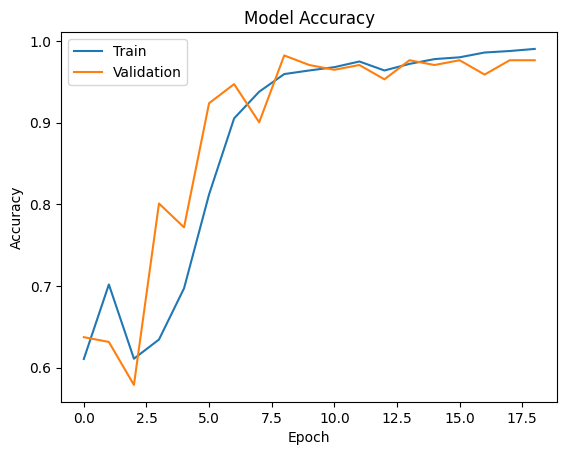

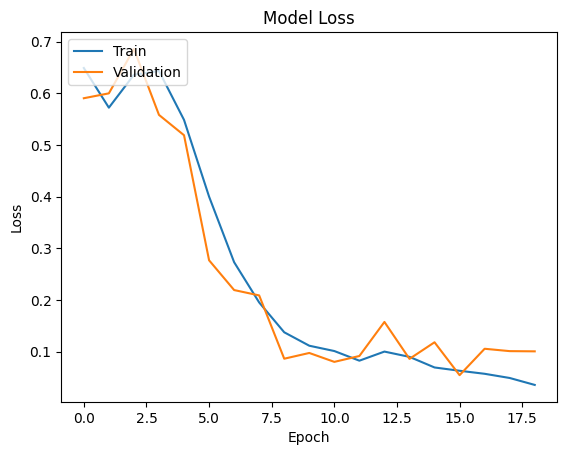

In [ ]:
# Define el modelo
model_cnnAugmented = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(SIZE, SIZE, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model_cnnAugmented.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callback de Early Stopping
early_stop = EarlyStopping(
    monitor='val_accuracy',     # métrica a monitorear
    patience=10,             # n° de épocas sin mejora antes de detener
    restore_best_weights=True,  # recupera los mejores pesos encontrados
    verbose=1
)

# Entrenar el modelo con EarlyStopping
history_cnnAugmented = model_cnnAugmented.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, y_val),  # Use your test data for validation
    callbacks=[early_stop]
)

# Evaluar el modelo
loss, accuracy = model_cnnAugmented.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Analizar métricas
print(history_cnnAugmented.history.keys())

# Gráfica de precisión
plt.plot(history_cnnAugmented.history['accuracy'])
plt.plot(history_cnnAugmented.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Gráfica de pérdida
plt.plot(history_cnnAugmented.history['loss'])
plt.plot(history_cnnAugmented.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

for layer in vgg_model.layers:
    layer.trainable = False


vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
features_extractor = vgg_model.predict(X_train)
features_extractor_test = vgg_model.predict(X_test)
features_extarctor_val = vgg_model.predict(X_val)

features = features_extractor.reshape(features_extractor.shape[0], -1)
features_test = features_extractor_test.reshape(features_extractor_test.shape[0], -1)
features_val = features_extarctor_val.reshape(features_extarctor_val.shape[0], -1)

X_for_NN = features
X_for_NN_test = features_test
X_for_NN_val = features_val

86/86 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5392 - loss: 0.7238 - val_accuracy: 0.8421 - val_loss: 0.4822
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7428 - loss: 0.5216 - val_accuracy: 0.9064 - val_loss: 0.2642
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8461 - loss: 0.3811 - val_accuracy: 0.9298 - val_loss: 0.1970
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8505 - loss: 0.3462 - val_accuracy: 0.9298 - val_loss: 0.1864
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8843 - loss: 0.2866 - val_accuracy: 0.9123 - val_loss: 0.1985
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9080 - loss: 0.2557 - val_accuracy: 0.9532 - val_loss: 0.1573
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9052 - loss: 0.2783 - val_accuracy: 0.9474 - val_loss: 0.1682
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8942 - loss: 0.2782 - val_accuracy: 0.9415 - 

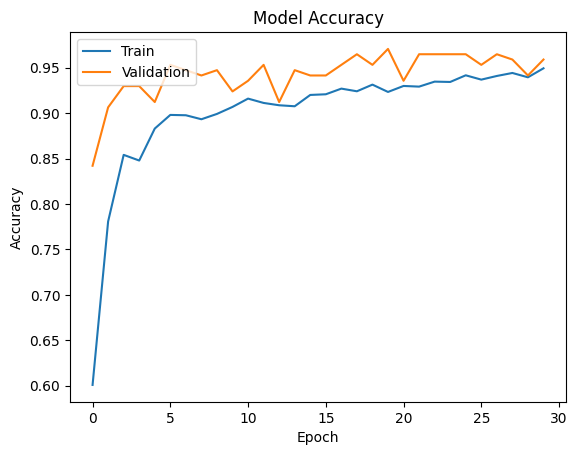

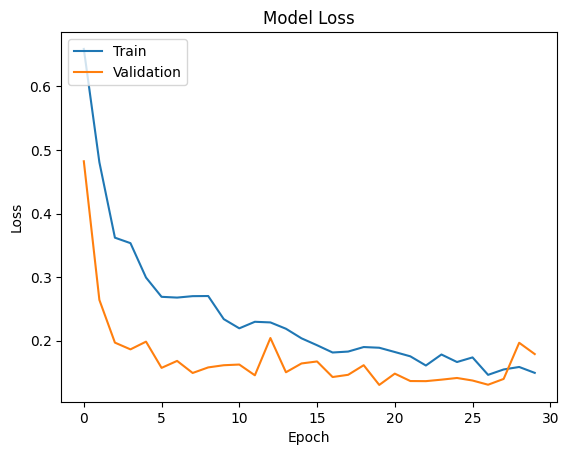

In [ ]:
model_cnnVGG16 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_for_NN.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stop = EarlyStopping(
    monitor='val_loss',     # métrica a monitorear
    patience=10,             # n° de épocas sin mejora antes de detener
    restore_best_weights=True,  # recupera los mejores pesos encontrados
    verbose=1
)

model_cnnVGG16.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_cnnVGG16 = model_cnnVGG16.fit(
    X_for_NN, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_for_NN_val, y_val),
    callbacks=[early_stop]
)

loss, accuracy = model_cnnVGG16.evaluate(X_for_NN_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Gráfica de precisión
plt.plot(history_cnnVGG16.history['accuracy'])
plt.plot(history_cnnVGG16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Gráfica de pérdida
plt.plot(history_cnnVGG16.history['loss'])
plt.plot(history_cnnVGG16.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_for_NN, y_train)

y_pred_rf = model_rf.predict(X_for_NN_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.897196261682243


In [ ]:
# Obtener probabilidades
y_pred_ff = model_feedForward.predict(X_test).flatten()
y_pred_cnn = model_cnn.predict(X_test).flatten()
y_pred_cnnaug = model_cnnAugmented.predict(X_test).flatten()
y_pred_vgg = model_cnnVGG16.predict(X_for_NN_test).flatten()
y_pred_rf = model_rf.predict_proba(X_for_NN_test)[:, 1]

# Ensemble por promedio
ensemble_probs = (y_pred_ff + y_pred_cnn + y_pred_cnnaug + y_pred_vgg + y_pred_rf) / 5
ensemble_pred = (ensemble_probs >= 0.5).astype(int)

# Evaluar
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print(f"Ensemble Accuracy: {ensemble_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Ensemble Accuracy: 0.9579439252336449


In [ ]:
from sklearn.metrics import roc_auc_score, precision_score


# Evaluate the feedforward model
print("FeedForward")
loss, accuracy_ff, auc_ff, precision_ff, recall = model_feedForward.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy_ff}")
print(f"Test AUC: {auc_ff}")
print(f"Test Precision: {precision_ff}")
print(f"Test Recall: {recall}")

# ... (rest of your code)

# Evaluate the CNN model
print("CNN")
loss, accuracy_cnn = model_cnn.evaluate(X_test, y_test)
y_pred_cnn = model_cnn.predict(X_test)
auc_cnn = roc_auc_score(y_test, y_pred_cnn)
precision_cnn = precision_score(y_test, (y_pred_cnn > 0.5).astype(int))

print(f"Test Loss (CNN): {loss}")
print(f"Test Accuracy (CNN): {accuracy_cnn}")
print(f"Test AUC (CNN): {auc_cnn}")
print(f"Test Precision (CNN): {precision_cnn}")

# ... (rest of your code)

#Evaluate the CNN augmented model
print("CNN Augmented")
loss, accuracy_cnnaug = model_cnnAugmented.evaluate(X_test, y_test)
y_pred_cnnaug = model_cnnAugmented.predict(X_test)
auc_cnnaug = roc_auc_score(y_test, y_pred_cnnaug)
precision_cnnaug = precision_score(y_test, (y_pred_cnnaug > 0.5).astype(int))

print(f"Test Loss (CNN Augmented): {loss}")
print(f"Test Accuracy (CNN Augmented): {accuracy_cnnaug}")
print(f"Test AUC (CNN Augmented): {auc_cnnaug}")
print(f"Test Precision (CNN Augmented): {precision_cnnaug}")

# ... (rest of your code)

# Evaluate the VGG16 model
print("VGG16")
loss, accuracy_cnnvgg = model_cnnVGG16.evaluate(X_for_NN_test, y_test)
y_pred_vgg = model_cnnVGG16.predict(X_for_NN_test)
auc_vgg = roc_auc_score(y_test, y_pred_vgg)
precision_vgg = precision_score(y_test, (y_pred_vgg > 0.5).astype(int))

print(f"Test Loss (VGG16): {loss}")
print(f"Test Accuracy (VGG16): {accuracy_cnnvgg}")
print(f"Test AUC (VGG16): {auc_vgg}")
print(f"Test Precision (VGG16): {precision_vgg}")

# ... (rest of your code)

# Evaluate the Random Forest model
print("Random Forest")
y_pred_rf = model_rf.predict(X_for_NN_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)


print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest AUC: {auc_rf}")
print(f"Random Forest Precision: {precision_rf}")


# Evaluate ensemble model
print("Ensemble model")
accuracy_ensemble = accuracy_score(y_test, ensemble_pred)
presicion_ensemble = precision_score(y_test, ensemble_pred)
auc_ensemble = roc_auc_score(y_test, ensemble_probs)
print(f"Ensemble Accuracy: {accuracy_ensemble}")
print(f"Ensemble Precision: {presicion_ensemble}")
print(f"Ensemble AUC: {auc_ensemble}")

FeedForward
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.7143 - Precision: 0.6881 - Recall: 0.7270 - accuracy: 0.6662 - loss: 0.6283
Test Loss: 0.6057105660438538
Test Accuracy: 0.6682242751121521
Test AUC: 0.7303671836853027
Test Precision: 0.703125
Test Recall: 0.7317073345184326
CNN
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9321 - loss: 0.2568
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Test Loss (CNN): 0.22443819046020508
Test Accuracy (CNN): 0.9299065470695496
Test AUC (CNN): 0.983739837398374
Test Precision (CNN): 0.9655172413793104
CNN Augmented
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9350 - loss: 0.3735
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Test Loss (CNN Augmented): 0.3862050771713257
Test Accuracy (CNN Augmented): 0.9252336621284485
Test AUC (CNN Augmented): 0.9779326364692218
Test Precision (CNN Augmented): 0.9819819819819819
VGG16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9221 - loss: 0.2191 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Test Loss (VGG16)

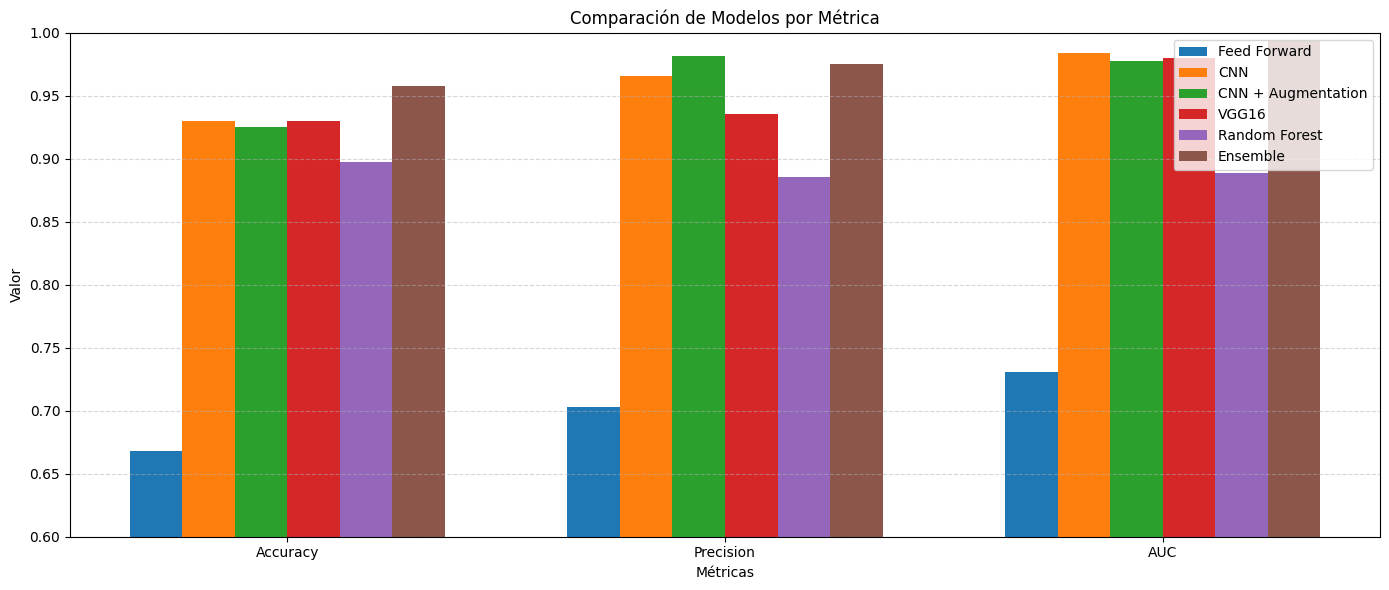

In [ ]:
presicion = [precision_ff, precision_cnn, precision_cnnaug, precision_vgg, precision_rf, presicion_ensemble]
accuracy_models = [accuracy_ff, accuracy_cnn, accuracy_cnnaug, accuracy_cnnvgg, accuracy_rf, accuracy_ensemble]
auc = [auc_ff, auc_cnn, auc_cnnaug, auc_vgg, auc_rf, auc_ensemble]

# Ahora invertimos: agrupamos por métrica (cada grupo tendrá las barras de los modelos)

# Datos: ya definidos
metricas = ["Accuracy", "Precision", "AUC"]
model_names = [
    "Feed Forward",
    "CNN",
    "CNN + Augmentation",
    "VGG16",
    "Random Forest",
    "Ensemble"
]

# Convertir a np.array para fácil manipulación
accuracy_np = np.array(accuracy_models)
precision_np = np.array(presicion)
auc_np = np.array(auc)

# Agrupar por métrica (cada métrica tiene una lista con valores de cada modelo)
metric_values = [accuracy_np, precision_np, auc_np]

x = np.arange(len(metricas))  # eje x: las métricas
width = 0.12

fig, ax = plt.subplots(figsize=(14, 6))

# Dibujar barras para cada modelo dentro de cada grupo de métrica
for i, model in enumerate(model_names):
    values = [accuracy_np[i], precision_np[i], auc_np[i]]
    ax.bar(x + width*i, values, width=width, label=model)

ax.set_xlabel("Métricas")
ax.set_ylabel("Valor")
ax.set_title("Comparación de Modelos por Métrica")
ax.set_xticks(x + width*2.5)
ax.set_xticklabels(metricas)
ax.set_ylim([0.6, 1.0])
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()
